In [1]:
%pylab inline

# Import a bunch of stuff to ease command line usage.
from tvb.simulator.lab import *
from tvb.simulator.models.epileptor import Epileptor
from tvb.datatypes.time_series import TimeSeriesRegion
import numpy as np
import time as tm
import matplotlib.pyplot as plt 
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialise a Connectivity.
con = connectivity.Connectivity.from_file('connectivity_76.zip')
N = con.weights.shape[0]
con.weights - con.weights * np.eye(N, N)
con.weights = con.weights / np.abs(con.weights.max())
#con.tract_lengths = np.zeros((con.tract_lengths.shape))   # no time-delays
con.speed=np.array([3])
con.configure()

WARNING  File 'hemispheres' not found in ZIP.


In [3]:
import numpy

# Initialise the complete model.
Epileptor5D = models.epileptor.Epileptor(Ks=numpy.array([-0.2]), r=numpy.array([0.00015]))
Epileptor5D.x0 = np.ones((76))*(-2.9)                #NEZ
Epileptor5D.x0[[62, 30, 40]] = np.ones((3))*(-1.1)   #EZ
Epileptor5D.x0[[69, 70]] = np.ones((2))*(-1.9)       #PZ

#Initial conditions.
Epileptor5D.state_variable_range["x1"] = numpy.array([-2, 1])
Epileptor5D.state_variable_range["y1"] = numpy.array([-20, 2])
Epileptor5D.state_variable_range["x2"] = numpy.array([-2,0])
Epileptor5D.state_variable_range["y2"] = numpy.array([0, 2])
Epileptor5D.state_variable_range["z"] = numpy.array([2, 5])

Epileptor5D.variables_of_interest = ['x2 - x1', 'x1', 'z']

In [4]:
# Initialise Simulator.
sim = simulator.Simulator(model=Epileptor5D, 
                          connectivity=con,
                          conduction_speed=np.float(con.speed),
                          coupling=coupling.Difference(a=numpy.array([-0.2])), 
                          integrator=integrators.HeunDeterministic(dt=0.05), 
                          monitors=(monitors.TemporalAverage(period=1.),))

sim.configure()

,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 20ed3e4a-c092-4a05-9d1f-9555e24ffa5c
coupling,Difference gid: e9e914be-8a59-4911-999c-adda312b7ac9
gid,UUID('1e71e795-65c5-41a4-89a7-41fe1f052c3b')
initial_conditions,None
integrator,HeunDeterministic gid: e4200132-95b5-44ff-b030-c61a9d8f7860
model,Epileptor gid: 44247d82-65d0-48b2-8013-b651fd95a0d1
monitors,"(,)"
simulation_length,1000.0


In [5]:
print("Starting simulation...")
tic = tm.time()
(s, z), = sim.run(simulation_length=10000)
print("Finished simulation.")
print('execute for ' + str(tm.time()-tic))

Starting simulation...
WARNING  random_state supplied for non-stochastic integration
Finished simulation.
execute for 37.17033362388611


In [6]:
z /= (np.max(z, 0) - np.min(z, 0))
z -= np.mean(z, 0)

z = np.squeeze(np.array(z))
z.shape

(10000, 3, 76)

In [7]:
z[:10,0,1]
#np.arange(1,76)

array([-0.3740954 , -0.43938358, -0.54023664, -0.90616497, -0.32251706,
       -0.23936091, -0.24112537, -0.24350596, -0.24658014, -0.25045579])

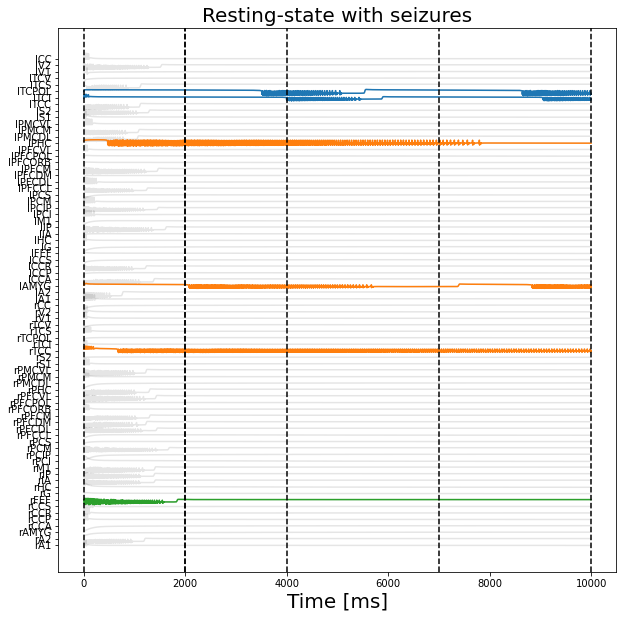

In [8]:
# Plot time series.
#这个plot里面的+号是为了让不同位置的信号可以按顺序排列，我觉得有点神奇嗷
fig1 = plt.figure(figsize=(10,10))
plt.plot(z[:,0,:]+np.r_[:76], 'k', alpha=0.1)
plt.yticks(np.arange(len(con.region_labels)), con.region_labels, fontsize=10)

EZs = [62, 30, 40]
for ie, ez in enumerate(EZs):
    plt.plot(z[:, 0,EZs[ie]] + EZs[ie], 'C1')
PZs = [69, 70]
for ip, pz in enumerate(PZs):
    plt.plot(z[:, 0,PZs[ip]] + PZs[ip], 'C0')
    
plt.plot(z[:, 0,7] + 7, 'C2')

  
plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=2000, color='k', linestyle='--')

plt.axvline(x=2000, color='k', linestyle='--')
plt.axvline(x=4000, color='k', linestyle='--')

plt.axvline(x=7000, color='k', linestyle='--')
plt.axvline(x=10000, color='k', linestyle='--')

    
plt.title('Resting-state with seizures', fontsize=20)
plt.xlabel('Time [ms]', fontsize=20)

plt.show()

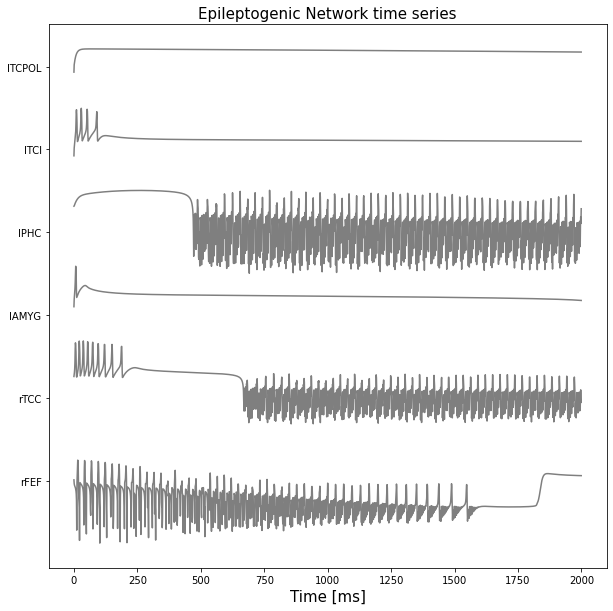

In [9]:
EN = [7,30,40,62, 69,70]
idx = np.arange(len(EN))

fig2 = plt.figure(figsize=(10,10))
for ie, en in enumerate(EN):
    plt.plot(np.arange(0,2000), z[0:2000,0, EN[ie]] + idx[ie], 'k', alpha=0.5)
plt.title('Epileptogenic Network time series', fontsize=15)
plt.xlabel('Time [ms]', fontsize=15)
plt.yticks(np.arange(len(EN)), con.region_labels[EN])

plt.show()

ValueError: x and y must have same first dimension, but have shapes (20000,) and (0,)

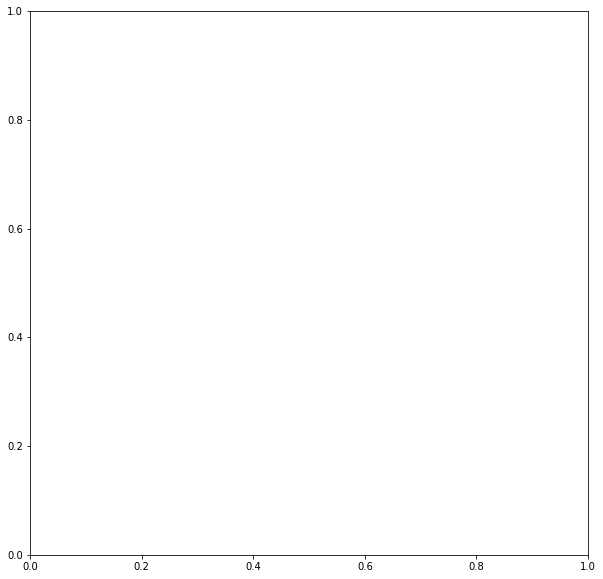

In [10]:
EN = [40,47,62, 69,70,73]
idx = np.arange(len(EN))

fig2 = plt.figure(figsize=(10,10))


for ie, en in enumerate(EN):
    plt.plot(np.arange(30000, 50000), z[30000:50000,0, EN[ie]] + idx[ie], 'k', alpha=0.5)
plt.title('Epileptogenic Network time series', fontsize=15)
plt.xlabel('Time [ms]', fontsize=15)
plt.yticks(np.arange(len(EN)), con.region_labels[EN])

plt.show()